In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준 편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 777)

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1, l1_l2


model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu',  kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu',  kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu',  kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 12s 7ms/step - loss: 1.8083 - acc: 0.4153 - val_loss: 1.5436 - val_acc: 0.5049
Epoch 2/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4374 - acc: 0.5510 - val_loss: 1.3689 - val_acc: 0.5706
Epoch 3/20
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2638 - acc: 0.6155 - val_loss: 1.2172 - val_acc: 0.6257
Epoch 4/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1294 - acc: 0.6631 - val_loss: 1.1416 - val_acc: 0.6507
Epoch 5/20
1094/1094 [==============================] - 11s 10ms/step - loss: 1.0275 - acc: 0.6979 - val_loss: 1.0726 - val_acc: 0.6805
Epoch 6/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9408 - acc: 0.7277 - val_loss: 1.0245 - val_acc: 0.6947
Epoch 7/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8639 - acc: 0.7548 - val_loss: 1.0016 - val_acc: 0.7083
Epoch 8/20
1094/1094 [==============================] - 8s 

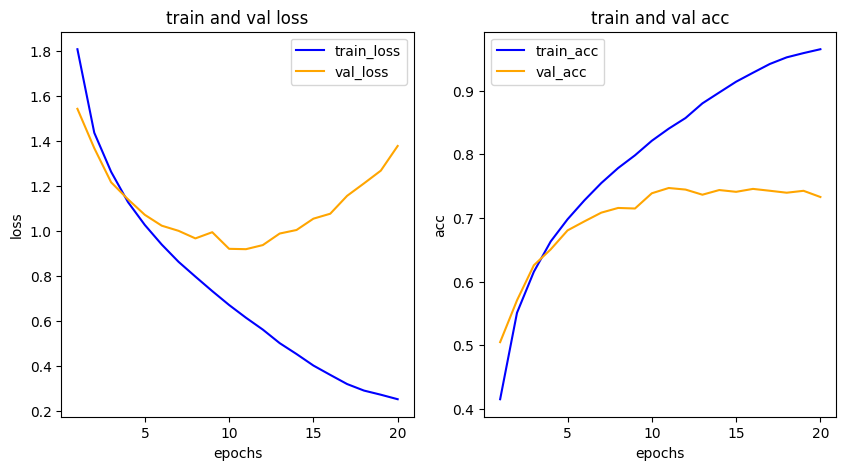

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2)) # 드롭아웃을 추가합니다.
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 16s 12ms/step - loss: 1.7572 - acc: 0.3625 - val_loss: 1.4823 - val_acc: 0.4587
Epoch 2/30
1094/1094 [==============================] - 9s 9ms/step - loss: 1.4145 - acc: 0.4912 - val_loss: 1.2993 - val_acc: 0.5342
Epoch 3/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2611 - acc: 0.5497 - val_loss: 1.1907 - val_acc: 0.5758
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1392 - acc: 0.5964 - val_loss: 1.0456 - val_acc: 0.6239
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0462 - acc: 0.6292 - val_loss: 1.0056 - val_acc: 0.6391
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9686 - acc: 0.6612 - val_loss: 0.9223 - val_acc: 0.6734
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9051 - acc: 0.6823 - val_loss: 0.8732 - val_acc: 0.6895
Epoch 8/30
1094/1094 [==============================] - 10s

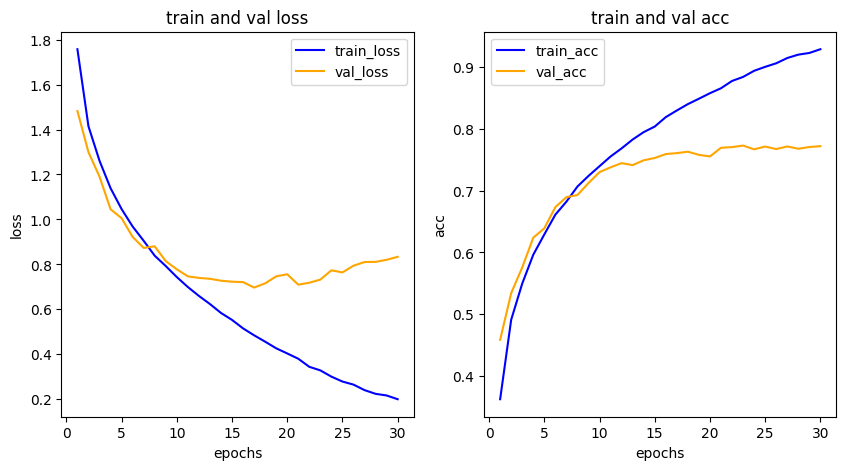

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3,
                 padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 18s 10ms/step - loss: 1.4211 - acc: 0.4974 - val_loss: 1.1769 - val_acc: 0.5811
Epoch 2/30
1094/1094 [==============================] - 14s 13ms/step - loss: 1.0023 - acc: 0.6521 - val_loss: 1.0500 - val_acc: 0.6283
Epoch 3/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.7982 - acc: 0.7265 - val_loss: 0.9887 - val_acc: 0.6565
Epoch 4/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6437 - acc: 0.7852 - val_loss: 0.9514 - val_acc: 0.6726
Epoch 5/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5111 - acc: 0.8343 - val_loss: 0.9096 - val_acc: 0.6839
Epoch 6/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.3968 - acc: 0.8801 - val_loss: 0.9638 - val_acc: 0.6792
Epoch 7/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.2999 - acc: 0.9159 - val_loss: 0.9658 - val_acc: 0.6849
Epoch 8/30
1094/1094 [=============================

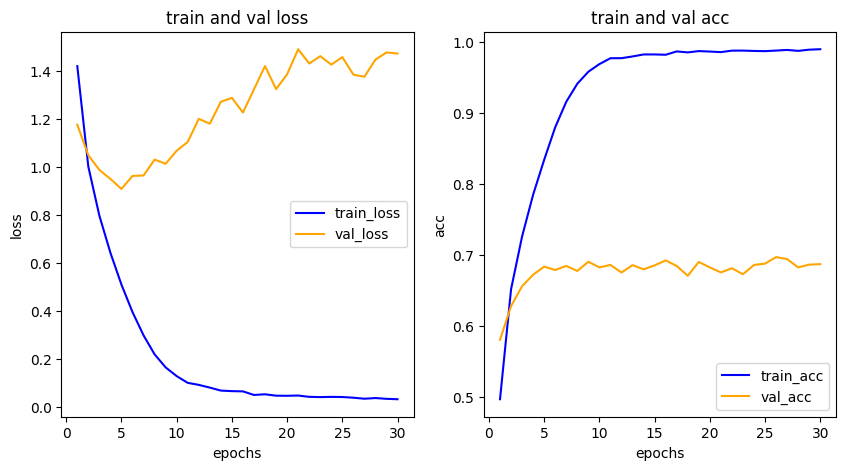

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()